## Generalized linear mixed model

### Overview

An analysis which determine a relationship between number of leaves and survival seeds of a fictitious plant was conducted. The data size was 100 and number of studied seeds for each plant were eight.

Language: R  
Model: Generalized linear mixed mode(GLMM)  
Fitting: maximum likelihood estimation(MLE)  
R package: glmmML, ggplot2  

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
library(glmmML)
library(ggplot2)

In [3]:
%%R
dglmm <- read.csv("data.csv") 
summary(dglmm)

       N           y              x           id        
 Min.   :8   Min.   :0.00   Min.   :2   Min.   :  1.00  
 1st Qu.:8   1st Qu.:1.00   1st Qu.:3   1st Qu.: 25.75  
 Median :8   Median :3.00   Median :4   Median : 50.50  
 Mean   :8   Mean   :3.81   Mean   :4   Mean   : 50.50  
 3rd Qu.:8   3rd Qu.:7.00   3rd Qu.:5   3rd Qu.: 75.25  
 Max.   :8   Max.   :8.00   Max.   :6   Max.   :100.00  


y = number of seed  
x = number of leaf

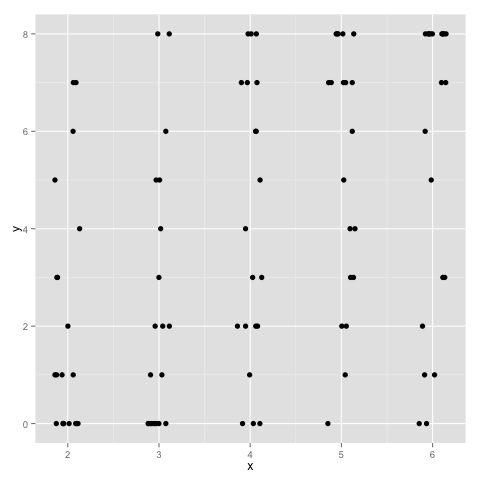

In [4]:
%%R
gglmm <- ggplot(dglmm,
                aes(
                    x = x,
                    y = y
                    )
                )

gglmm <- gglmm + geom_point(position=position_jitter(width=.15, height=0), size=2.5)
plot(gglmm)

To make sure that this data obeys binomial distribution,
a distribution of seeds number when x is 4 is demonstrated.

$logit(q_1) = \beta_1 + \beta_2 x_1 $, when $q_1$ is suvival rate, $x_i$ is quantity of leaves.

In [5]:
%%R
fit <- glm(cbind(y, N-y) ~ x,
           data = dglmm,
           family = binomial
           )
fit


Call:  glm(formula = cbind(y, N - y) ~ x, family = binomial, data = dglmm)

Coefficients:
(Intercept)            x  
    -2.1487       0.5104  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    607.4 
Residual Deviance: 513.8 	AIC: 649.6


As following above table,$logit(q_1) = -2.14 + 0.51 x_1 $.

When $x_i$ is 4, savival rate should obey following equition.

logistic ( -2.15 + 0.51×4 ) = 0.47

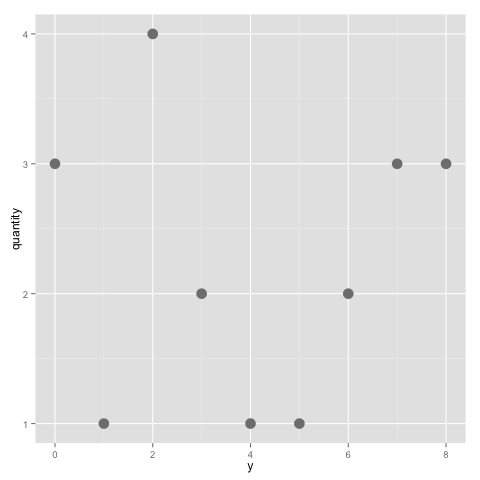

In [6]:
%%R
d4 <- dglmm[dglmm$x == 4,]

#Draw a distribution when x = 4.
d4_q <- read.csv("x4_quantity.csv") 
gd4_q <- ggplot(d4_q,
                aes(
                    x = y,
                    y = quantity
                    )
                )

gd4_q <- gd4_q + geom_point(colour="grey50", size = 5) 

plot(gd4_q)


This graph cleary does not obey bionomial distribusion and overdisperation might occer.

Therefore, random term $r$ is set and added previous equition. 


$logit(q_1) = \beta_1 + \beta_2 x_1 + r_i$

In [7]:
%%R
glmmML(cbind(y, N - y) ~x, data = dglmm, family = binomial, cluster = id)


Call:  glmmML(formula = cbind(y, N - y) ~ x, family = binomial, data = dglmm,      cluster = id) 


              coef se(coef)      z Pr(>|z|)
(Intercept) -4.190   0.8777 -4.774 1.81e-06
x            1.005   0.2075  4.843 1.28e-06

Scale parameter in mixing distribution:  2.408 gaussian 
Std. Error:                              0.2202 

        LR p-value for H_0: sigma = 0:  2.136e-55 

Residual deviance: 269.4 on 97 degrees of freedom 	AIC: 275.4 


As following above table, $logit(q_1) = -4.19 + 1.005 x_1 + r$.

Hance, the prediction line is draw like following picture. 

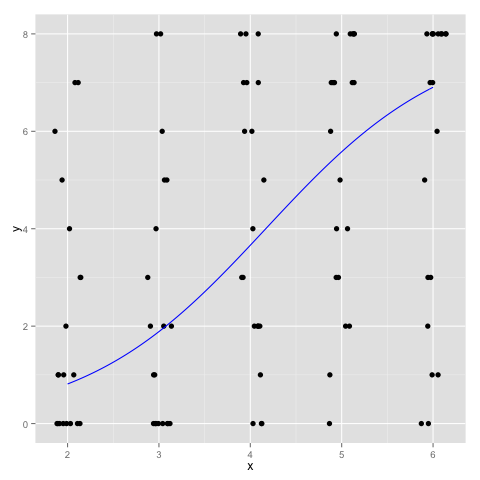

In [8]:
%%R
#logistic function is defined as func <- 1/(1 + exp(-(-4.190 + 1.005*z))*N
func <- function(z) { 8*(1/(1 + exp(-(-4.190 + 1.005*z))))}

#Draw the graph
gglmm <- ggplot(dglmm,
                aes(
                    x = x,
                    y = y
                    )
                )

gglmm <- gglmm + geom_point(position=position_jitter(width=.15, height=0), size=2.5)
gglmm <- gglmm + stat_function(fun=func, colour = "blue")

plot(gglmm)